In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

from keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
def plot_img(img):
  plt.imshow(img.reshape(28,28), cmap="gray")

Image is :  3


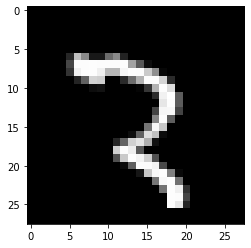

In [8]:
plot_img(x_train[500])
print("Image is : " , y_train[500])

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [10]:
model = Sequential()
model.add( Dense(units=32, activation='relu', input_shape = (784,))  ) # input_shape only for first layer
model.add( Dense(units=64, activation='relu' ))
model.add( Dense(units=128, activation = 'relu'))
model.add( Dense(units=32, activation = 'relu'))
model.add( Dense(units=10, activation='softmax')) # final  softmax = > probabilities

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
hist = model.fit(x=x_train, y= y_train, batch_size=32,epochs = 10, validation_data=(x_test, y_test) )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7551 - accuracy: 0.7930 - val_loss: 0.3014 - val_accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2626 - accuracy: 0.9259 - val_loss: 0.2248 - val_accuracy: 0.9375
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1911 - accuracy: 0.9454 - val_loss: 0.1787 - val_accuracy: 0.9465
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9532 - val_loss: 0.1628 - val_accuracy: 0.9561
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1435 - accuracy: 0.9582 - val_loss: 0.1526 - val_accuracy: 0.9592
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1311 - accuracy: 0.9623 - val_loss: 0.1682 - val_accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9661 - val_loss: 0.1711 - val_accuracy:

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9643


[0.1417723000049591, 0.9642999768257141]

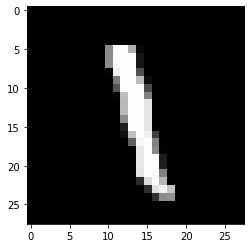

In [16]:
plot_img(x_test[700])

In [17]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
y_pred[700]

1

In [19]:
model.predict_classes(x_test[[300]])

array([4])